[![Banner-Introducci-n.png](https://i.postimg.cc/VkCcqsvv/Banner-Introducci-n.png)](https://postimg.cc/4YsMZgzR)

# Introducción a ciencia de datos
## L3: Analisis de Varianza - ANOVA

De acuerdo con el caso de uso del sector retail vamos a realizar un análisis de varianza, la cual es una herramienta estadística que nos permite realizar comparaciones de medias entre dos o más grupos.

### Objetivos
1. Identificar las grupos de análisis
2. Construir los valores para la tabla ANOVA
3. Evaluar el test de hipótesis con el valor P
4. Concluir a través del test la diferencia entre medias

### 1. Contexto del caso
La compañía está muy interesada en lanzar campañas promocionales por lugar de residencia de los potenciales compradores, para esto ha dispuesto una categoría de prueba, esta categoría de productos será elegida por aquella que tenga mayor cantidad de compras, para realizar un estudio de la diferencia de precios en los 5 departamentos donde más ventas se tengan. La pregunta que se plantea la compañía es ¿cómo vamos a comporar varias medias de población? Para esto vamos a realizar un análisis de varianza (ANOVA) de los precios entre los departamentos top 

### 2. Importación de librerías y archivos
En las siguientes líneas de código se importaran los materiales de trabajo necesarios para desarrollar el caso de uso, en esto se incluyen las *librerías y los datos*

In [1]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para manejo de datos
import pandas as pd
# cargar los datos en csv
data= pd.read_csv('Datos_C1_Introduccion_M3.csv', sep=';')
#Calcular p valor de la F
import scipy.stats as stats

Es importante tener en cuenta la visualización de los datos porque además de contexto se puede entender mucho mejor de qué se está hablando y qué tipos de datos se han cargado desde la máquina

In [2]:
#visualizar los primeros registros
data.head(5)

,producto_id,precio,valor_flete,departamento_vendedor,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,nombre_categoria_producto
0,d1ef230269a528a5683f93b17ced0fbb,39.99,17.92,SP,1150.0,20.0,18.0,43.0,brinquedos
1,8d0fb54bb58d39a72269eb8fc708e865,23.90,7.43,SP,200.0,16.0,10.0,16.0,esporte_lazer
2,2ffdf10e724b958c0f7ea69e97d32f64,213.90,13.00,SP,263.0,17.0,12.0,13.0,relogios_presentes
3,ff5d7f21d255435967dfbe72b5dcdb57,39.00,15.10,SP,167.0,17.0,3.0,17.0,telefonia
4,4a52073965ad17f345f579bdbdbabd74,35.40,12.23,SP,350.0,16.0,5.0,11.0,perfumaria


### 3.ANOVA

La idea básica detrás de un ANOVA de una vía es tomar muestras de cada grupo y luego calcular las medias muestrales para cada grupo. Luego, comparar la variación de las medias muestrales entre los grupos con la variación dentro de los grupos. 
Finalmente, podremos tomar una decisión basada en la estadística de prueba, si las medias de los grupos son todas iguales o no.

Teniendo claro nuestro objetivo de análisis vamos a realizar el arreglo de los datos para obtener la categoría de estudio y cómo influyen los departamentos en los precios de esta categoría

In [3]:
#buscar la categoría top de productos
categoria_top=data.groupby('nombre_categoria_producto').count().reset_index()[['nombre_categoria_producto','producto_id']].sort_values(by=['producto_id'], ascending=False)
categoria_top_lista=categoria_top.head(1)['nombre_categoria_producto']
categoria_top.head(1)

,nombre_categoria_producto,producto_id
13,cama_mesa_banho,471


In [4]:
# Encontrar los departamentos top 5
departamento_top=data.groupby('departamento_vendedor').count().reset_index()[['departamento_vendedor','producto_id']].sort_values(by=['producto_id'], ascending=False)
departamento_top_lista=departamento_top.head()['departamento_vendedor'].to_list()
departamento_top.head()

,departamento_vendedor,producto_id
19,SP,3463
12,PR,428
6,MG,422
13,RJ,218
17,SC,211


In [5]:
#filtrar por los departamentos top
data_top=data[data['nombre_categoria_producto'].isin(categoria_top_lista) & data['departamento_vendedor'].isin(departamento_top_lista)]
data_top[['precio','departamento_vendedor','nombre_categoria_producto']].head()

,precio,departamento_vendedor,nombre_categoria_producto
6,160.00,SP,cama_mesa_banho
11,24.99,SP,cama_mesa_banho
14,59.99,SP,cama_mesa_banho
15,125.99,SP,cama_mesa_banho
23,78.99,SP,cama_mesa_banho


### 3.1. Aplicación de ANOVA

Retomando la aplicación vista en la inforgrafía debemos identificar la estimación de mínimos cuadrados

$SST=SSA+SSE$

* SST representa la suma de varianzas de cada dato con respecto a la varianza total
* SSA representa la suma de varianzas con respecto al factor A 
* SSE representa la suma de varianzas que no pueden ser explicadas.

La cantidad total de variabilidad proviene de dos fuentes posibles, a saber:
1. Diferencia entre los grupos  (que podemos explicar a través de SSA)
2. Diferencia dentro de los grupos (que podemos explicar a través de SSE)

La suma de los cuadrados debido al factor (SSA) y la suma de los cuadrados debido al error (SSE) se enumeran en la tabla ANOVA de una vía. La suma de SSA y SSE es igual a la suma total de cuadrados (SST).

### 3.1.1. Hipótesis de ANOVA
El esquema simple de la prueba ANOVA :
Prueba F para diferencias en más de dos medias

$H₀: μ₁ = μ₂ = μ₃ =… $

$H₁:$ No todos los $μᵢ$ son iguales, donde $i = 1, 2, 3,….$

Nivel de significancia = $α$

donde μ es la media muestral del factor

En las siguientes líneas vamos a calcular los requistos necesarios para el cálculo de el test ANOVA
1. Calcular los tamaños de los grupos para la n
2. Calcular la varianza de los grupos
3. Crear la tabla con la suma de las varianzas

In [6]:
# Variables de interés
data_muestra=data_top[['precio','departamento_vendedor']]
tamano_grupos = data_muestra.groupby('departamento_vendedor').count().reset_index()
tamano_grupos

,departamento_vendedor,precio
0,MG,16
1,PR,8
2,RJ,7
3,SC,25
4,SP,408


<AxesSubplot:xlabel='departamento_vendedor'>

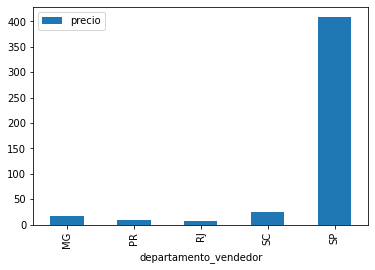

In [7]:
tamano_grupos.plot(kind='bar',x='departamento_vendedor',y='precio')

In [8]:
# varianza de los grupos
varianza_grupos = data_muestra.groupby('departamento_vendedor').std()
varianza_grupos

,precio
departamento_vendedor,
MG,33.904638
PR,33.912953
RJ,18.894275
SC,43.581367
SP,62.864406


Ya con estos dos elementos podemos proceder al cálculo de la tabla, con esto podremos realizar la prueba de hipótesis y mirar si existen diferencias entre los promedios de los precios en las 5 ciudades que más se venden

In [9]:
# Crear la estructura de tabla ANOVA 
data = [['SSA', '', '', '', '', ''], ['SSE', '', '', '', '', ''], ['Total', '', '', '', '', '']] 
anova_tabla = pd.DataFrame(data, columns = ['Fuente de variación', 'SS', 'gdl', 'MS', 'F', 'P-valor']) 
anova_tabla.set_index('Fuente de variación', inplace = True)
anova_tabla

,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,,,,,
SSE,,,,,
Total,,,,,


una vez creada la tabla, podemos empezar a encontrar los valores para rellenarla, para esto vamos a calcular: 

* SST
* SSE
* SSA

y actualizarlos en la tabla

In [10]:
# Calcular la SSA y actualizamos la tabla
promedio_precio = data_muestra['precio'].mean()
SSA = data_muestra.groupby('departamento_vendedor').count() * (data_muestra.groupby('departamento_vendedor').mean() - promedio_precio)**2
anova_tabla.at['SSA', 'SS'] = SSA['precio'].sum()
anova_tabla.at['SSA', 'SS']

37108.44295407303

In [11]:
# Calculas la SSE y actualizar en la tabla
SSE = (data_muestra.groupby('departamento_vendedor').count() - 1) * data_muestra.groupby('departamento_vendedor').std()**2
anova_tabla.at['SSE', 'SS'] = SSE['precio'].sum()
anova_tabla.at['SSE', 'SS']

1681456.4730286857

In [12]:
# Calcular SST y actualizar en la tabla
SST = SSA['precio'].sum() + SSE['precio'].sum()
anova_tabla.at['Total', 'SS']= SST
anova_tabla.at['Total', 'SS']

1718564.9159827586

Ya tenemos calculados nuestro $SST=SSA+SSE$

$1718564.91=37108.44 + 1681456.47$

Nuestros siguientes campos serán calcular:
* Grados de liberta (gdl)
* MS

In [13]:
# Calcular los grados de libertas
anova_tabla['gdl']['SSA'] = data_muestra['departamento_vendedor'].nunique() - 1
anova_tabla['gdl']['SSE'] = data_muestra.shape[0] - data_muestra['departamento_vendedor'].nunique()
anova_tabla['gdl']['Total'] = data_muestra.shape[0] - 1

In [14]:
anova_tabla['gdl']['SSA']

4

In [15]:
anova_tabla['gdl']['SSE']

459

In [16]:
anova_tabla['gdl']['Total']

463

In [17]:
# Calcular MS
anova_tabla['MS'] = anova_tabla['SS'] / anova_tabla['gdl']
anova_tabla['MS']

Fuente de variación
SSA      9277.110739
SSE      3663.303863
Total    3711.803274
Name: MS, dtype: object

Ya con los cálculos de los grados de libertad y con el MS calculado podemos estimar el valor F y el Valor p para la prueba estadística

In [18]:
# Calcular F 
F = anova_tabla['MS']['SSA'] / anova_tabla['MS']['SSE']
anova_tabla.at['SSA','F'] = F
F

2.532443686341701

In [19]:
# Calcular p-valor
anova_tabla.at['SSA','P-valor'] = 1 - stats.f.cdf(F, anova_tabla.at['SSA','gdl'], anova_tabla.at['SSE','gdl'])
anova_tabla.at['SSA','P-valor']

0.03973637683183251

Con estos últimos cálculos podemos obtener el valor P de la F calculada, puedes también revisar la formulación que se propone en la infografía y cómo se traduce a lenguaje de programación, por último vamos a visualizar la tabla ya completa y evaluar la hipótesis de igualdad de medias

In [20]:
# Visualizar tabla ANOVA
anova_tabla

,SS,gdl,MS,F,P-valor
Fuente de variación,,,,,
SSA,37108.442954,4,9277.110739,2.532444,0.039736
SSE,1681456.473029,459,3663.303863,,
Total,1718564.915983,463,3711.803274,,


In [21]:
anova_tabla.at['SSA','P-valor']

0.03973637683183251

In [22]:
# Evaluar la hipótesis con un nivel de confianza del 95% y significancia del 5%
alpha=0.05 #Establecer la significancia
# Evaluar la hipótesis
print("Usar el P-valor para decidir sobre la hipótesis")
if anova_tabla.at['SSA','P-valor'] <= alpha:
    conclusion = "Se rechaza hipótesis nula "
else:
    conclusion = "No se rechaza hipótesis nula "
print(conclusion)
print("Valor F es:", anova_tabla['F']['SSA'], " y el P-valor es:", anova_tabla['P-valor']['SSA'])    


Usar el P-valor para decidir sobre la hipótesis
Se rechaza hipótesis nula 
Valor F es: 2.532443686341701  y el P-valor es: 0.03973637683183251


Vemos que el P-valor es menor que nuestro  α por lo tanto se puede rechazar la hipótesis nula, esto nos muestra que las medias entre departamento son diferentes,por lo tanto nos refleja diferentes precios en el análisis, lo que podemos buscar con la compañía es dónde se encuentran los precios más altos para realizar la campaña de marketing allí, además analizar cómo fomentar las mismas compras en los diferentes departamentos 